### This is an analysis of the Quanitum Customer segment analysis against the marking scheme

In [230]:
# Load the nesessary libraries
# Importing the necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
sns.set() # Setting seaborn as default style
    

In [231]:
# Loading the customer data sets from google drive.
path="https://docs.google.com/spreadsheets/d/e/2PACX-1vS4MqswS0ISKSntl85QN9aOo7r_6tRiftdPCakXYfc2WZ4bH1Zad0DANYL6BaNq1MyPG8Yq4nN7q8xi/pub?output=csv"
customer_df=pd.read_csv(path)
customer_df.head()


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [232]:
# Loading transactional data from google drive
path_1="https://docs.google.com/spreadsheets/d/e/2PACX-1vT6Tr4sh8b1XcXn477IEMWVfsA-v4qF3M-BNF9s4Wka7pMru71W4PTaTuhQ4K6chQ/pub?output=csv"
transact_df=pd.read_csv(path_1)
transact_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#### Checking the datatypes of both datasets


In [233]:
# Checking datatypes of the customer dataset
customer_dt=customer_df.dtypes
print(customer_dt)

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object


In [234]:
# Datatypes
transact_dt=transact_df.dtypes
print(transact_dt)
# The date time dataset is an integer, we need to convert it to a datetime format

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object


In [235]:
# Converting the date column to datetime
transact_df['DATE']=transact_df['DATE'].astype('datetime64[D]')
transact_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2088-10-18,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2089-05-15,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2089-05-21,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2088-08-18,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2088-08-19,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#### looking for outliers in the product names section. Remove any product not related to potato category

In [236]:
# Examine if we are looking at the right products by assessing the product name
transact_df['PROD_NAME']



0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [237]:
# Checking the unique words in the column, to detect outliers
product_names=transact_df['PROD_NAME'].unique()
print(type(product_names))
# Coverting the numpy array into a string
prod_names=np.array2string(product_names,separator=',')



<class 'numpy.ndarray'>


In [238]:
# Replacing special characters in product names.
replacements={'[#,@,&]':''}
transact_df['PROD_NAME'].replace(replacements,regex=True,inplace=True)
transact_df['PROD_NAME']

0          Natural Chip        Compny SeaSalt175g
1                        CCs Nacho Cheese    175g
2          Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/CreamOnion 175g
4         Kettle Tortilla ChpsHnyJlpno Chili 150g
                           ...                   
264831    Kettle Sweet Chilli And Sour Cream 175g
264832              Tostitos Splash Of  Lime 175g
264833                   Doritos Mexicana    170g
264834    Doritos Corn Chip Mexican Jalapeno 150g
264835              Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

### Checking for null values and outliers

In [239]:
# Superficial data summary
transact_df.info()
# There are no null values in the set and the datatypes are well labeled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [240]:
# Numerical column description for checking outliers
transact_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [241]:
cols=["STORE_NBR","LYLTY_CARD_NBR","TXN_ID","PROD_NBR","PROD_QTY","TOT_SALES"]
for i,cols in enumerate(cols):
    print(type(cols))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


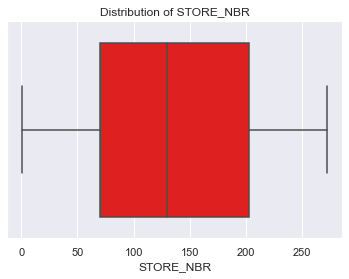

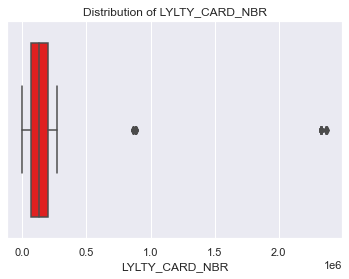

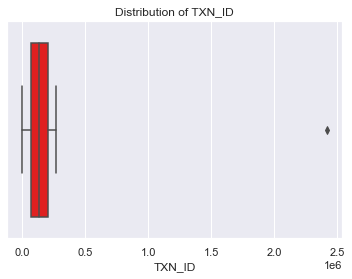

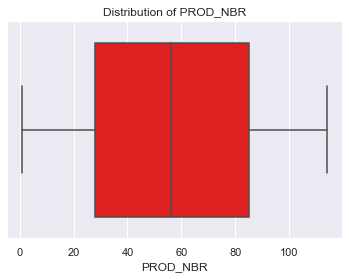

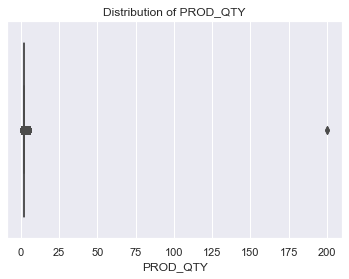

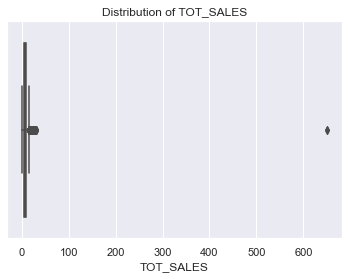

In [242]:
# Distrobution of numerical columns
cols=["STORE_NBR","LYLTY_CARD_NBR","TXN_ID","PROD_NBR","PROD_QTY","TOT_SALES"]
# Forming subplots
# fig,axes=plt.subplots(len(cols),figsize=(8,10))
for col_num,columns in enumerate(cols):
    sns.boxplot(data=transact_df,x=columns,color="red")
    plt.title(f"Distribution of {columns}")
    plt.show()


Outliers detected in product quantity and total sales

### Dealing with outliers

In [245]:
# Checking the row with a product quantity of 200
outlier_cust=transact_df.loc[transact_df['PROD_QTY']==200]
# There are two different transactions ,done on two different days from the same customer.They must be a retail customer who shops in bulk.To avoid skewing our results we drop the customer
outlier_cust
transact_df_clean=transact_df[transact_df['LYLTY_CARD_NBR']!=226000	]
transact_df_clean.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


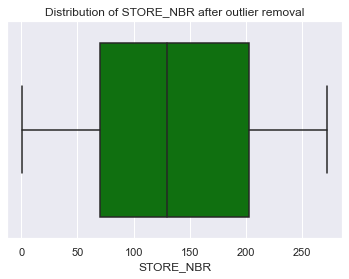

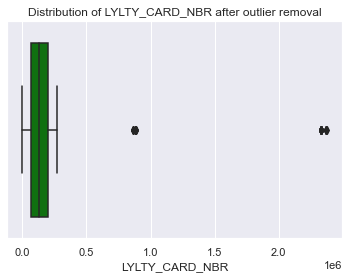

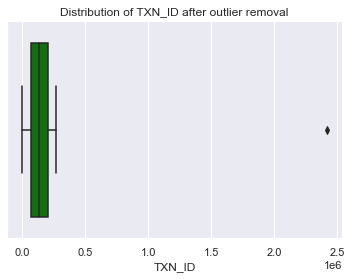

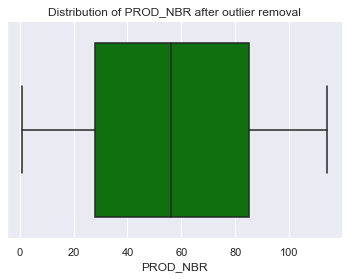

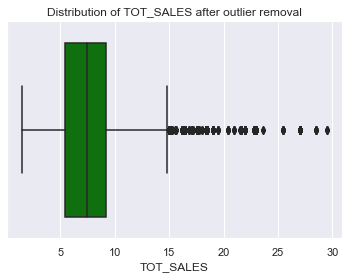

In [250]:
# Distribution of numerical columns
cols=["STORE_NBR","LYLTY_CARD_NBR","TXN_ID","PROD_NBR","TOT_SALES"]
# Forming subplots
# fig,axes=plt.subplots(len(cols),figsize=(8,10))
for col_num,columns in enumerate(cols):
    sns.boxplot(data=transact_df_clean,x=columns,color="green")
    plt.title(f"Distribution of {columns} after outlier removal")
    plt.show()


### Transaction lines over time

In [253]:
# Looking at the number of transactions per day to check for missing values.
transact_df_clean['DATE'].value_counts()

2088-12-25    939
2088-12-24    917
2088-12-23    915
2088-12-20    906
2088-12-19    862
             ... 
2088-12-13    664
2089-06-25    662
2089-06-14    659
2088-10-19    658
2088-11-26    648
Name: DATE, Length: 364, dtype: int64